GPU Compare Analysis - Final Comparison
Loading GPU Compare Excel file...
Data loaded successfully! Shape: (28, 3)
Columns: ['Date', 'Actual_Test_Balance', 'Predicted_Balance_Denormalized']

First few rows:
         Date  Actual_Test_Balance  Predicted_Balance_Denormalized
0  2024-12-06             75893.04                       141373.69
1  2024-12-07             75893.04                       138681.64
2  2024-12-08             75893.04                       136728.88
3  2024-12-09             50893.04                       130191.99
4  2024-12-10             50893.04                       137846.02

Potential date columns: ['Date']
Potential balance columns: ['Actual_Test_Balance', 'Predicted_Balance_Denormalized']

Using columns:
Date: Date
Test Balance: Actual_Test_Balance
Prediction Balance: Predicted_Balance_Denormalized

Diagram saved as 'gpu_comparison_diagram.png'


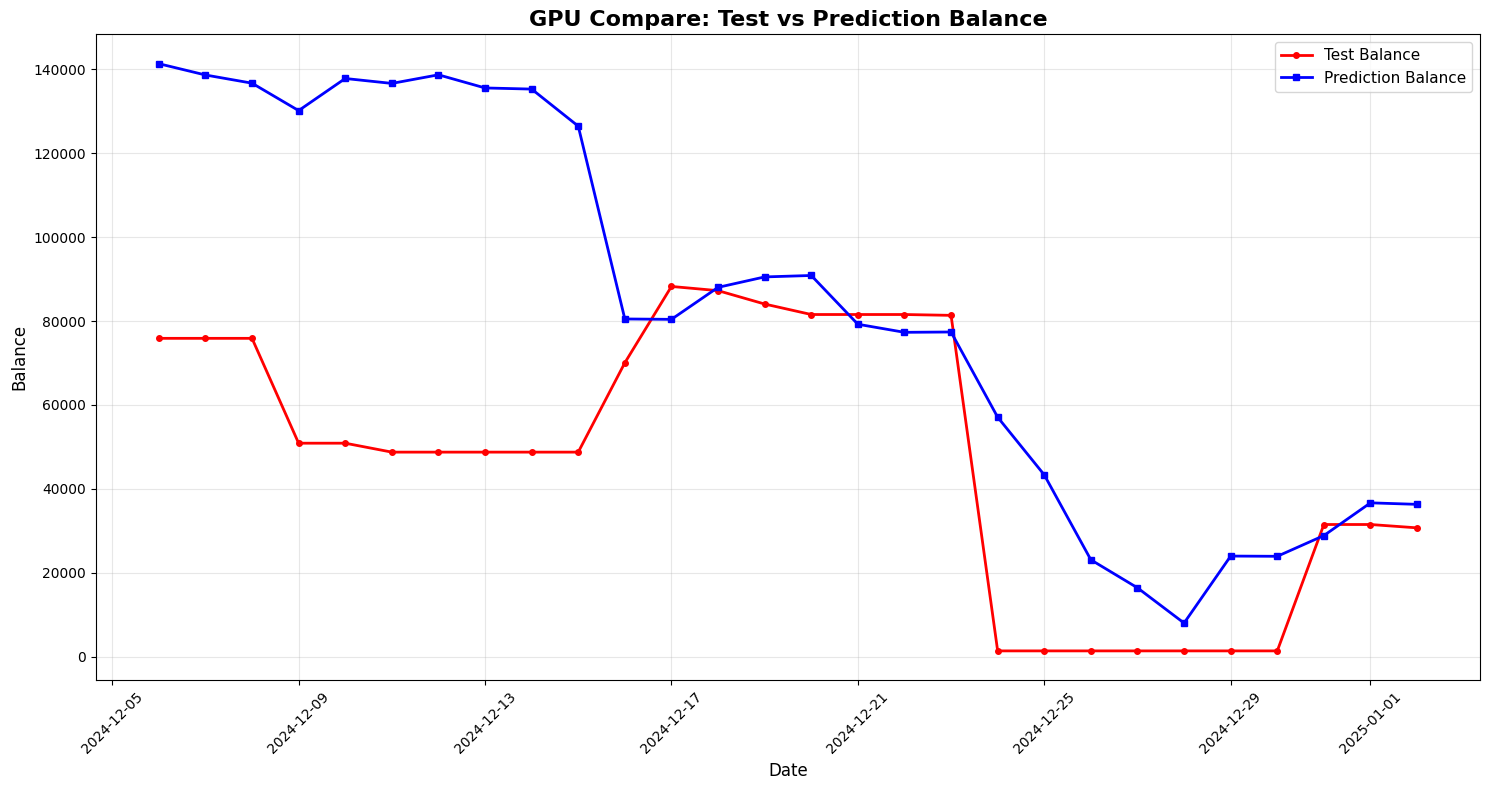


Statistics:
Date range: 2024-12-06 00:00:00 to 2025-01-02 00:00:00
Test Balance - Mean: 47584.56, Std: 32120.38
Prediction Balance - Mean: 82846.28, Std: 46493.14
Correlation between test and prediction: 0.6365
Mean Absolute Error: 36762.77


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def load_and_plot_gpu_comparison():
    """
    Load GPU compare Excel file and generate comparison diagram
    """
    print("Loading GPU Compare Excel file...")
    
    try:
        # Load the Excel file
        df = pd.read_excel('gpu_compare - Copy.xlsx')
        
        print(f"Data loaded successfully! Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print("\nFirst few rows:")
        print(df.head())
        
        # Check if we have date and balance columns
        # Common column names for dates and balances
        date_columns = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
        balance_columns = [col for col in df.columns if 'balance' in col.lower() or 'value' in col.lower()]
        
        print(f"\nPotential date columns: {date_columns}")
        print(f"Potential balance columns: {balance_columns}")
        
        # Try to identify the correct columns
        if len(date_columns) > 0:
            date_col = date_columns[0]
        else:
            # Try to find date column by checking data types
            for col in df.columns:
                if df[col].dtype == 'object':
                    try:
                        pd.to_datetime(df[col].iloc[0])
                        date_col = col
                        break
                    except:
                        continue
            else:
                # If no date column found, use the first column
                date_col = df.columns[0]
        
        # Convert date column to datetime
        df[date_col] = pd.to_datetime(df[date_col])
        
        # Find test and prediction balance columns
        test_col = None
        pred_col = None
        
        for col in df.columns:
            col_lower = col.lower()
            if 'test' in col_lower or 'actual' in col_lower:
                test_col = col
            elif 'pred' in col_lower or 'forecast' in col_lower:
                pred_col = col
        
        # If not found, try to identify by position or naming patterns
        if test_col is None or pred_col is None:
            numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
            if len(numeric_cols) >= 2:
                test_col = numeric_cols[0]
                pred_col = numeric_cols[1]
            else:
                print("Could not identify test and prediction columns automatically")
                print("Available columns:", list(df.columns))
                return
        
        print(f"\nUsing columns:")
        print(f"Date: {date_col}")
        print(f"Test Balance: {test_col}")
        print(f"Prediction Balance: {pred_col}")
        
        # Create the plot
        plt.figure(figsize=(15, 8))
        
        # Plot test balance in red
        plt.plot(df[date_col], df[test_col], 
                color='red', linewidth=2, label='Test Balance', marker='o', markersize=4)
        
        # Plot prediction balance in blue
        plt.plot(df[date_col], df[pred_col], 
                color='blue', linewidth=2, label='Prediction Balance', marker='s', markersize=4)
        
        # Customize the plot
        plt.title('GPU Compare: Test vs Prediction Balance', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Balance', fontsize=12)
        plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)
        
        # Adjust layout to prevent label cutoff
        plt.tight_layout()
        
        # Save the plot
        plt.savefig('gpu_comparison_diagram.png', dpi=300, bbox_inches='tight')
        print("\nDiagram saved as 'gpu_comparison_diagram.png'")
        
        # Show the plot
        plt.show()
        
        # Print some statistics
        print(f"\nStatistics:")
        print(f"Date range: {df[date_col].min()} to {df[date_col].max()}")
        print(f"Test Balance - Mean: {df[test_col].mean():.2f}, Std: {df[test_col].std():.2f}")
        print(f"Prediction Balance - Mean: {df[pred_col].mean():.2f}, Std: {df[pred_col].std():.2f}")
        
        # Calculate correlation
        correlation = df[test_col].corr(df[pred_col])
        print(f"Correlation between test and prediction: {correlation:.4f}")
        
        # Calculate mean absolute error
        mae = abs(df[test_col] - df[pred_col]).mean()
        print(f"Mean Absolute Error: {mae:.2f}")
        
    except Exception as e:
        print(f"Error loading or processing the Excel file: {str(e)}")
        print("Please make sure the file 'gpu_compare - Copy.xlsx' exists in the current directory.")

if __name__ == "__main__":
    # Set plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    print("GPU Compare Analysis - Final Comparison")
    print("="*50)
    
    # Load and plot the data
    load_and_plot_gpu_comparison() 